In [1]:
import os, sys
import pandas as pd
from pycaret.regression import *
sys.path.append(r"C:\work\water_use\CAWSC_WaterUse\WUtrainer")
from featurize import MultiOneHotEncoder
target = 'wu_rate'

# Load Dataset
## x

In [11]:
dataset = pd.read_csv(r"C:\work\water_use\ml_experiments\annual_v_0_0\clean_train_db.csv")


In [12]:
# categorical transformation
categorical_features = ['HUC2', 'state_id',  'Ecode_num', 'KG_climate_zone' ]
ohc1 = MultiOneHotEncoder(catfeatures = categorical_features )
dataset = ohc1.transform(dataset)

In [13]:
dataset

,population,households2,income_lt_10k,income_10K_15k,income_15k_20k,income_20k_25k,income_25k_30k,income_30k_35k,income_35k_40k,income_40k_45k,...,KG_climate_zone_15.0,KG_climate_zone_18.0,KG_climate_zone_19.0,KG_climate_zone_21.0,KG_climate_zone_22.0,KG_climate_zone_23.0,KG_climate_zone_25.0,KG_climate_zone_26.0,KG_climate_zone_27.0,KG_climate_zone_29.0
0,1989.268767,131.647092,0.052026,0.053691,0.048976,0.016238,0.009209,0.072842,0.054444,0.061716,...,0,0,0,0,0,0,0,1,0,0
1,5772.314587,1846.042352,0.019636,0.031197,0.044613,0.054641,0.022838,0.066263,0.020405,0.029527,...,0,0,0,0,0,0,0,1,0,0
2,1609.025674,535.573916,0.020321,0.038210,0.028977,0.021699,0.027331,0.050272,0.035395,0.046927,...,0,0,0,0,0,0,0,1,0,0
3,110.457080,119.466409,0.053245,0.042730,0.024751,0.051017,0.025344,0.044836,0.018793,0.068184,...,0,0,0,0,0,0,0,1,0,0
4,57.303487,17.043416,0.028942,0.018782,0.033672,0.040905,0.037707,0.045776,0.062613,0.067345,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75740,5.355180,3.412846,0.103384,0.051047,0.048311,0.061390,0.064781,0.040272,0.049677,0.057842,...,0,0,0,0,0,0,0,1,0,0
75741,5.410594,3.447148,0.092923,0.045202,0.051099,0.056797,0.063142,0.051824,0.047286,0.067757,...,0,0,0,0,0,0,0,1,0,0
75742,5.474165,3.468727,0.075156,0.046183,0.058164,0.055901,0.067612,0.051945,0.044559,0.055441,...,0,0,0,0,0,0,0,1,0,0
75743,39.102603,14.424455,0.058944,0.066382,0.073812,0.064322,0.048693,0.096601,0.035645,0.051238,...,0,0,0,0,0,0,0,1,0,0


In [14]:
del(dataset['pop'])
dataset = dataset[dataset['population']>1000]
if True:
    dataset['population'] = np.log10(dataset['population'] )
    dataset['wu_rate'] = np.log10(dataset['wu_rate'])

In [15]:
dataset

,population,households2,income_lt_10k,income_10K_15k,income_15k_20k,income_20k_25k,income_25k_30k,income_30k_35k,income_35k_40k,income_40k_45k,...,KG_climate_zone_15.0,KG_climate_zone_18.0,KG_climate_zone_19.0,KG_climate_zone_21.0,KG_climate_zone_22.0,KG_climate_zone_23.0,KG_climate_zone_25.0,KG_climate_zone_26.0,KG_climate_zone_27.0,KG_climate_zone_29.0
0,3.298693,131.647092,0.052026,0.053691,0.048976,0.016238,0.009209,0.072842,0.054444,0.061716,...,0,0,0,0,0,0,0,1,0,0
1,3.761350,1846.042352,0.019636,0.031197,0.044613,0.054641,0.022838,0.066263,0.020405,0.029527,...,0,0,0,0,0,0,0,1,0,0
2,3.206563,535.573916,0.020321,0.038210,0.028977,0.021699,0.027331,0.050272,0.035395,0.046927,...,0,0,0,0,0,0,0,1,0,0
5,3.456413,187.050777,0.107697,0.056822,0.096481,0.094059,0.086562,0.074224,0.051277,0.027448,...,0,0,0,0,0,0,0,1,0,0
6,3.553783,722.447993,0.066080,0.045442,0.057052,0.012371,0.051912,0.068089,0.091568,0.012359,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75642,4.579764,14405.595480,0.053248,0.057600,0.040584,0.056714,0.065182,0.084009,0.051599,0.045548,...,0,0,0,0,0,0,0,1,0,0
75643,4.593102,14589.411350,0.046537,0.053447,0.035784,0.049778,0.065751,0.073891,0.049448,0.048840,...,0,0,0,0,0,0,0,1,0,0
75644,4.612233,14887.052760,0.046697,0.055475,0.030575,0.044388,0.064976,0.061875,0.047532,0.048630,...,0,0,0,0,0,0,0,1,0,0
75645,4.627357,15263.185250,0.042488,0.044327,0.030445,0.041146,0.057845,0.052052,0.046531,0.055722,...,0,0,0,0,0,0,0,1,0,0


In [16]:
data = dataset.sample(frac=0.8, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (21805, 194)
Unseen Data For Predictions: (5451, 194)


In [17]:
exp_reg101 = setup(data = data, target = 'wu_rate', train_size = 0.7, 
                   #categorical_features =categorical_features,
                   fold_shuffle= True, data_split_shuffle=True, session_id=123,
                   #normalize = True, transformation = True, 
                   #combine_rare_levels = True, rare_level_threshold = 0.05,
                   #remove_outliers = True, outliers_threshold = 0.05,
                   #pca = True, pca_method = 'kernel', pca_components = 50,
                   #create_clusters = True, cluster_iter = 20
                   #polynomial_features = True, polynomial_degree = 2,
                   #feature_interaction = True, feature_ratio = True,
                   #use_gpu = True
                  )

,Description,Value
0,session_id,123
1,Target,wu_rate
2,Original Data,"(21805, 194)"
3,Missing Values,False
4,Numeric Features,193
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(15263, 180)"


In [ ]:
#!jupyter nbconvert --to script 1_model_development.ipynb

In [22]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1358,0.0831,0.2878,0.8400,0.0464,0.0247,3.5020
rf,Random Forest Regressor,0.1562,0.0909,0.3011,0.8249,0.0482,0.0282,6.9470
catboost,CatBoost Regressor,0.1901,0.1005,0.3168,0.8063,0.0504,0.0340,4.2640
xgboost,Extreme Gradient Boosting,0.1897,0.1041,0.3223,0.7993,0.0511,0.0338,2.5150
lightgbm,Light Gradient Boosting Machine,0.2062,0.1142,0.3378,0.7799,0.0535,0.0368,0.2560
knn,K Neighbors Regressor,0.2084,0.1497,0.3867,0.7115,0.0600,0.0374,0.1330
gbr,Gradient Boosting Regressor,0.2511,0.1588,0.3983,0.6939,0.0621,0.0447,3.3580
ridge,Ridge Regression,0.2812,0.1903,0.4358,0.6335,0.0672,0.0499,0.3430
br,Bayesian Ridge,0.2811,0.1903,0.4358,0.6335,0.0673,0.0499,0.3670
dt,Decision Tree Regressor,0.2074,0.1937,0.4397,0.6262,0.0706,0.0367,0.2020


In [ ]:
best

In [18]:
xgb1 = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1900,0.1061,0.3258,0.7970,0.0534,0.0345
1,0.1922,0.1011,0.3180,0.8111,0.0503,0.0341
2,0.1909,0.1222,0.3495,0.7755,0.0562,0.0350
3,0.1919,0.1058,0.3253,0.7904,0.0514,0.0341
4,0.1984,0.1144,0.3382,0.7703,0.0520,0.0349
5,0.1911,0.1018,0.3191,0.8028,0.0492,0.0337
6,0.1855,0.0915,0.3024,0.8189,0.0487,0.0330
7,0.1899,0.0981,0.3131,0.8064,0.0481,0.0329
8,0.1809,0.0874,0.2956,0.8307,0.0463,0.0318
9,0.1867,0.1131,0.3364,0.7898,0.0554,0.0338


In [ ]:
#boosted_dt = ensemble_model(xgb1, method = 'Boosting')

In [ ]:
tuned_xgb1 = tune_model(xgb1, search_algorithm = 'random') #, n_iter = 100

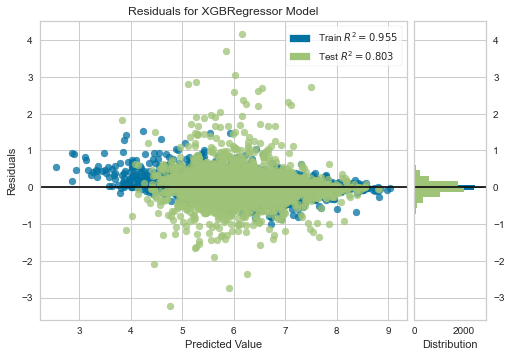

In [19]:
plot_model(xgb1)

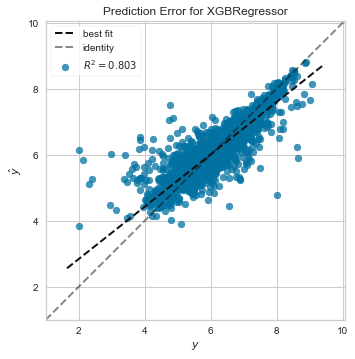

In [21]:
plot_model(xgb1, plot = 'error')

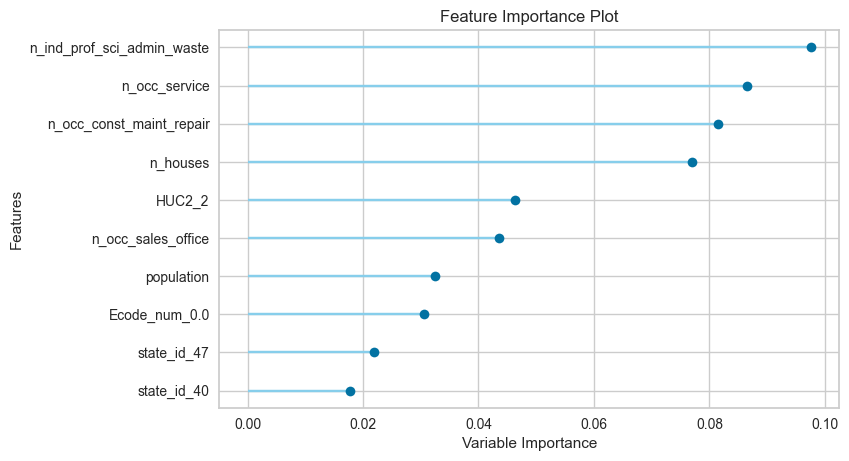

In [20]:
plot_model(xgb1, plot='feature')

In [ ]:
predict_model(tuned_xgb1)

In [ ]:
unseen_predictions = predict_model(tuned_xgb1, data=data_unseen)
unseen_predictions

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.wu_rate, unseen_predictions.Label, 'R2')